In [31]:
from pandas import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels import api as sm
import statsmodels.formula.api as smf
from ggplot import *

sns.set_style('whitegrid')
sns.set_context(font_scale=1.5)

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 32}

mpl.rc('font', **font)

%matplotlib inline

In [2]:
ls

3.1.hist_rainy_ridership.png     proj1_report.pdf
3.2.ridership_by_weekday.png     proj1_report2.pages
proj1_analysis.ipynb             turnstile-weather-variables.pdf
proj1_report.pages               turnstile_weather_v2.csv


In [3]:
df = read_csv('turnstile_weather_v2.csv')
df.describe(include='all')

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,42649,42649,42649,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
unique,240,31,6,NaN,NaN,NaN,NaN,186,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,R084,05-17-11,04:00:00,NaN,NaN,NaN,NaN,2011-05-28 20:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,186,1417,7381,NaN,NaN,NaN,NaN,240,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.812486e+07,1.986993e+07,1886.589955,1361.487866,NaN,10.046754,2.905719,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,NaN,NaN,NaN,3.043607e+07,2.028986e+07,2952.385585,2183.845409,NaN,6.938928,2.079231,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,NaN,NaN,NaN,1.039762e+07,7.613712e+06,274.000000,237.000000,NaN,4.000000,1.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,NaN,NaN,NaN,1.818389e+07,1.331609e+07,905.000000,664.000000,NaN,12.000000,3.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,NaN,NaN,NaN,3.263049e+07,2.393771e+07,2255.000000,1537.000000,NaN,16.000000,5.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033


In [4]:
out_var = 'ENTRIESn_hourly'

In [5]:
df_day = df.groupby(['DATEn', 'weekday'], as_index=0)[out_var].sum()

In [6]:
# analyze the weekday and weekend ENTRIESn_hourly
# question: is the weekend ENTRIESn_hourly
mask = df.rain == 1
df_rainy = df[mask]
df_non_rainy = df[~mask]

In [7]:
stats_a = df_rainy[out_var].describe()
stats_b = df_non_rainy[out_var].describe()

In [8]:
stats_a, stats_b

(count     9585.000000
 mean      2028.196035
 std       3189.433373
 min          0.000000
 25%        295.000000
 50%        939.000000
 75%       2424.000000
 max      32289.000000
 Name: ENTRIESn_hourly, dtype: float64, count    33064.000000
 mean      1845.539439
 std       2878.770848
 min          0.000000
 25%        269.000000
 50%        893.000000
 75%       2197.000000
 max      32814.000000
 Name: ENTRIESn_hourly, dtype: float64)

In [99]:
a = df[df.rain == 1][out_var]
b = df[df.rain == 0][out_var]
print mannwhitneyu(a, b)[1] * 2
print ttest_ind(a, b)

5.48213914249e-06
(array(5.334839860131678), 9.6115483857666826e-08)


In [10]:
df.columns

Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly',
       u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday',
       u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi',
       u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi',
       u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat',
       u'weather_lon'],
      dtype='object')

In [11]:
features = [
#     'EXITSn_hourly',
    'unit',
    'hour',
    'rain',
    'day_week',
    'meantempi',
]
# mod = sm.OLS(df)
mod = smf.ols('ENTRIESn_hourly ~ C(UNIT) + C(hour) + rain + C(day_week) + meantempi', df)
# mod = sm.OLS(df.sort('meantempi')[out_var], df.sort('meantempi').ix[:, features])
res = mod.fit()

print res.summary()

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     201.6
Date:                Sun, 31 May 2015   Prob (F-statistic):               0.00
Time:                        15:32:38   Log-Likelihood:            -3.8450e+05
No. Observations:               42649   AIC:                         7.695e+05
Df Residuals:                   42396   BIC:                         7.717e+05
Df Model:                         252                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept          663.2200    183.572  

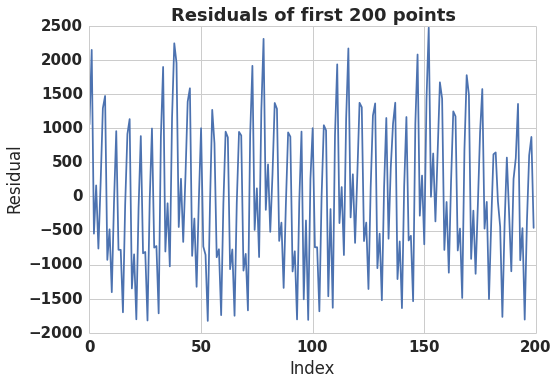

In [126]:
from statsmodels.graphics.tsaplots import plot_acf
plt.plot(range(200), res.resid[:200])
plt.title('Residuals of first 200 points')
plt.ylabel('Residual')
plt.xlabel('Index')
plt.savefig('5.1.residuals_line.png', bbox_inches='tight')

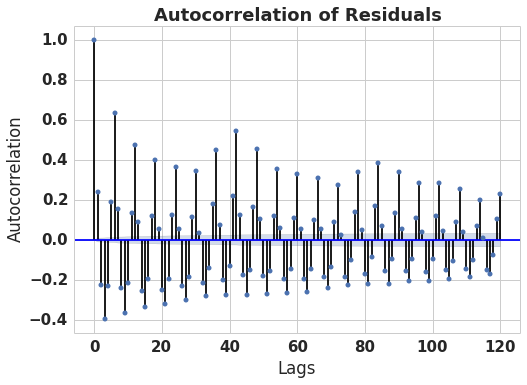

In [125]:
f, ax = plt.subplots()
plot_acf(res.resid, lags=120, ax=ax)
ax.set_title('Autocorrelation of Residuals')
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation')
f.savefig('5.1.autocorrelation_residuals.png', bbox_inches='tight')

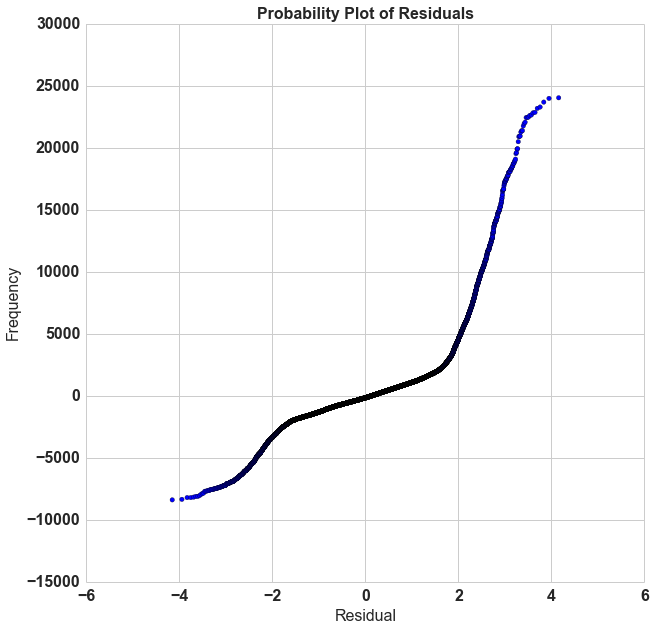

In [76]:
_ = scipy.stats.probplot(res.resid)[0]
plt.figure(figsize=(10, 10))
plt.scatter(_[0], _[1])
plt.title('Probability Plot of Residuals', fontsize=16)
plt.xlabel('Residual', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(labelsize=16)
plt.savefig('2.6.residuals_qqplot.png')

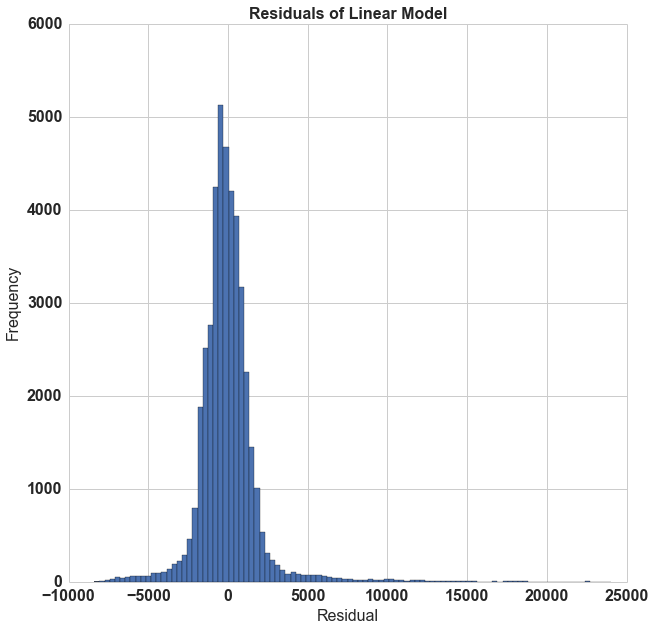

In [71]:
plt.figure(figsize=(10, 10))
plt.title('Residuals of Linear Model', fontsize=16)
plt.xlabel('Residual', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tick_params(labelsize=16)

plt.hist(res.resid, bins=100)
plt.savefig('2.6.residuals_histogram.png')

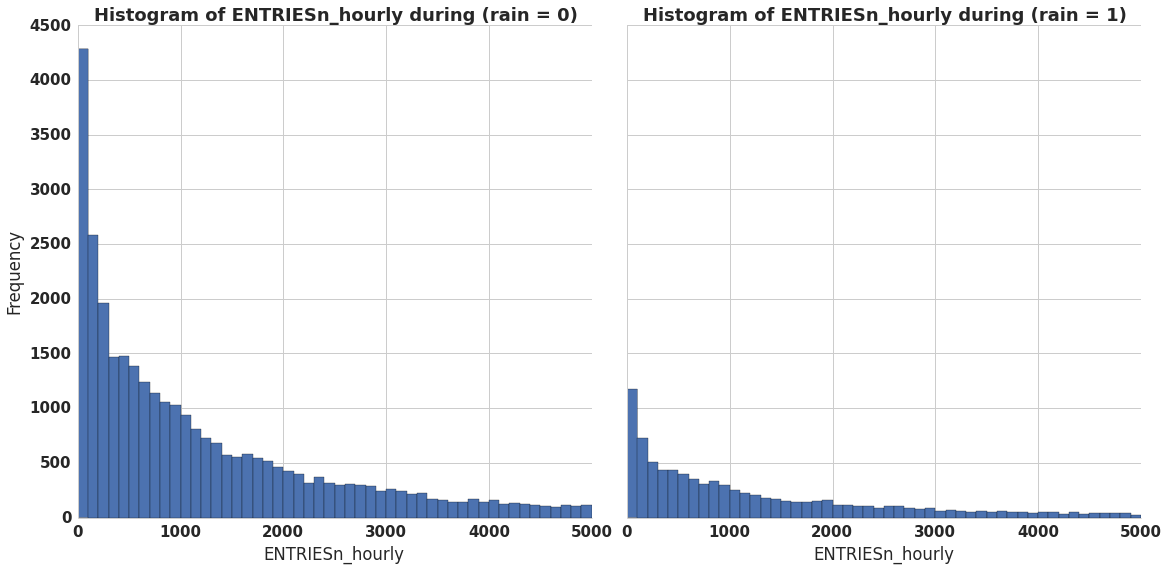

In [128]:
sns.set(font_scale=1.5, style='whitegrid')
g = sns.FacetGrid(data=df.ix[:, ['rain', out_var]], col='rain', size=8)
g.map(plt.hist, out_var, bins=50, range=(0, 5000), normed=False)
g.set_ylabels('Frequency')
g.axes.flat[0].set_title('Histogram of ENTRIESn_hourly during (rain = 0)')
g.axes.flat[1].set_title('Histogram of ENTRIESn_hourly during (rain = 1)')

g.savefig('3.1.hist_rainy_ridership.png', bbox_inches='tight')

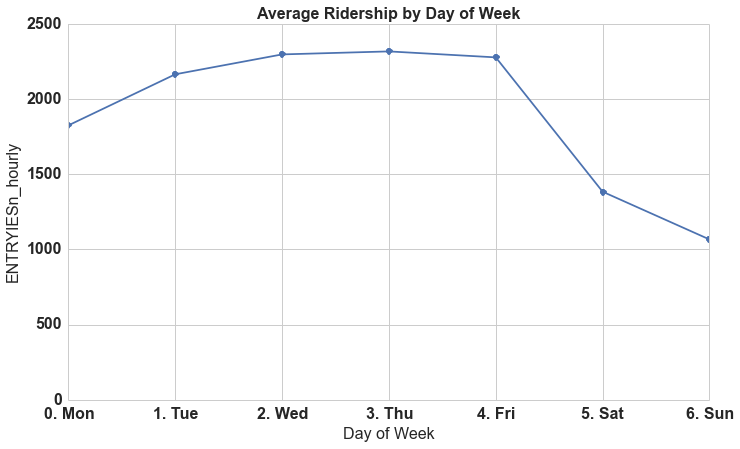

In [54]:
df['weekday'] = to_datetime(df['DATEn']).apply(lambda x: x.weekday())
fig, ax = plt.subplots()
ax.set_ylim((0, 2500))
ax.set_ylabel(out_var)

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df['weekday_label'] = df['weekday'].apply(lambda x: '{}. {}'.format(x, weekdays[x]))
df.groupby('weekday_label')[out_var].mean().plot(ax=ax, figsize=(10, 6), marker='o')
plt.tight_layout()
plt.tick_params(labelsize=16)
plt.title('Average Ridership by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=16)
plt.ylabel('ENTRYIESn_hourly', fontsize=16)
fig.savefig('3.2.ridership_by_weekday.png', bbox_inches='tight')

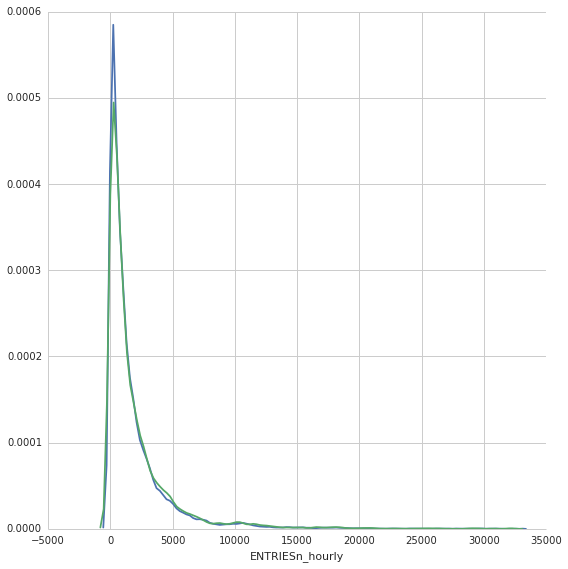

In [20]:
g = sns.FacetGrid(df, hue='rain', size=8)
g.map(sns.kdeplot, out_var)